In [1]:
#Regularation : - in deep learning 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#to load csv file
df=pd.read_csv("/content/drive/MyDrive/Google colab/housepricedata.csv")

In [3]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [4]:
#we want to predict either house'price > 50 lacs or < 50 lacs
#if >50 then consider=1 and less than <50 lac then 0 
#we have target : AboveMedianPrice  means this dataset is classification dataset

In [5]:
#check  null values
df.isnull().sum()

LotArea             0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
AboveMedianPrice    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [7]:
#separate input and output variable from dataset
X=df.drop("AboveMedianPrice",axis=1) #input features
Y=df["AboveMedianPrice"] #output means target

In [8]:
#train_test split(70% and 30%)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3,random_state=1)

In [9]:
#Now, apply StandardScaler on X_train and X_test data
from sklearn.preprocessing import StandardScaler

#create object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [12]:
#create a neural network 
model = tf.keras.models.Sequential([

    tf.keras.layers.Dense(5,input_shape=(X.shape[1],),activation="relu"), #hidden layer
    tf.keras.layers.Dense(10,activation="relu"), #hidden layer
   
    tf.keras.layers.Dense(5,activation="relu"), #hidden layer
    tf.keras.layers.Dense(1,activation="sigmoid"), #output layer


])


In [13]:
#compile the model
# Compile the model
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [14]:
#train the model
trained_model = model.fit(X_train,Y_train,batch_size=100,epochs=50)

Epoch 1/50
11/11 [==============================] - 1s 3ms/step - loss: 0.7042 - accuracy: 0.5092
Epoch 2/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.5004
Epoch 3/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.5167
Epoch 4/50
11/11 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.5409
Epoch 5/50
11/11 [==============================] - 0s 2ms/step - loss: 0.5568 - accuracy: 0.6688
Epoch 6/50
11/11 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.7597
Epoch 7/50
11/11 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.7836
Epoch 8/50
11/11 [==============================] - 0s 2ms/step - loss: 0.4984 - accuracy: 0.8375
Epoch 9/50
11/11 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.8514
Epoch 10/50
11/11 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.8692
Epoch 11/50
11/11 [

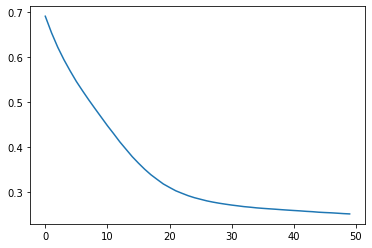

In [15]:
plt.plot(trained_model.history["loss"])
plt.show()

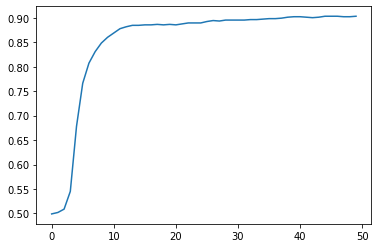

In [16]:
plt.plot(trained_model.history["accuracy"])
plt.show()

In [17]:
#Testing the model  
Y_pred = model.predict(X_test)
Y_pred

array([[9.66000378e-01],
       [5.21473765e-01],
       [1.30508244e-02],
       [8.18431377e-04],
       [8.06438923e-02],
       [8.95084202e-01],
       [9.92229462e-01],
       [3.01634133e-01],
       [9.54678297e-01],
       [9.38166142e-01],
       [7.36664772e-01],
       [1.33621693e-03],
       [9.23059106e-01],
       [9.43325877e-01],
       [9.58609760e-01],
       [1.49996877e-02],
       [1.47823095e-02],
       [6.68615997e-02],
       [3.52438062e-01],
       [1.52066916e-01],
       [1.51403844e-02],
       [6.68099225e-02],
       [9.67409790e-01],
       [9.95711923e-01],
       [3.24057937e-02],
       [9.31643128e-01],
       [2.19617009e-01],
       [8.89704466e-01],
       [9.99935508e-01],
       [7.86309838e-02],
       [9.07815397e-02],
       [7.08860457e-02],
       [1.24633908e-02],
       [7.13270903e-03],
       [9.48760808e-02],
       [9.96742249e-01],
       [5.60507774e-02],
       [8.76933336e-04],
       [9.71719503e-01],
       [4.60712314e-02],


In [18]:
Y_test

258     1
267     1
288     0
649     0
1233    0
       ..
793     1
631     1
1172    1
1167    1
529     1
Name: AboveMedianPrice, Length: 438, dtype: int64

In [19]:
Y_pred = np.where(Y_pred >= 0.5,1,0)
Y_pred

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
    

In [20]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       221
           1       0.89      0.89      0.89       217

    accuracy                           0.89       438
   macro avg       0.89      0.89      0.89       438
weighted avg       0.89      0.89      0.89       438



In [21]:
#score is very good but we try can be do more much better 
#score : f1-score .89 and .88 , region pf less score , can be possible model is overfit
#training error<testing error 
#so apply regularisation similar to ML 

In [22]:
#How to Regulartisation in deep learning 
#There are 2 types of regularisation
#1. Lasso means L1
#2. Ridge means L2 

#create a neural network  ,add error on training time use L2 means Ridge regularisation
model1 = tf.keras.models.Sequential([

    tf.keras.layers.Dense(5,input_shape=(X.shape[1],),activation="relu"), #hidden layer1
    tf.keras.layers.Dense(10,activation="relu",kernel_regularizer = tf.keras.regularizers.l2(0.02)), #hidden layer2
    tf.keras.layers.Dense(5,activation="relu",kernel_regularizer = tf.keras.regularizers.l2(0.02)), #hidden layer3
    tf.keras.layers.Dense(1,activation="sigmoid") #output layer
    #here 0.01 is the value of lambda /alpha means hyperparameter
    #in ridge means L2= error or loss (RSS)+lambda*sum(squareof(all coef))


])

In [23]:
# Compile the model
model1.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [24]:
#train the model
trained_model1 = model1.fit(X_train,Y_train,batch_size=100,epochs=50)

Epoch 1/50
11/11 [==============================] - 0s 2ms/step - loss: 0.9956 - accuracy: 0.5211
Epoch 2/50
11/11 [==============================] - 0s 2ms/step - loss: 0.9434 - accuracy: 0.5305
Epoch 3/50
11/11 [==============================] - 0s 2ms/step - loss: 0.8831 - accuracy: 0.5645
Epoch 4/50
11/11 [==============================] - 0s 1ms/step - loss: 0.8523 - accuracy: 0.5780
Epoch 5/50
11/11 [==============================] - 0s 1ms/step - loss: 0.8276 - accuracy: 0.6053
Epoch 6/50
11/11 [==============================] - 0s 2ms/step - loss: 0.8028 - accuracy: 0.6172
Epoch 7/50
11/11 [==============================] - 0s 2ms/step - loss: 0.7777 - accuracy: 0.6342
Epoch 8/50
11/11 [==============================] - 0s 2ms/step - loss: 0.7467 - accuracy: 0.6621
Epoch 9/50
11/11 [==============================] - 0s 1ms/step - loss: 0.7309 - accuracy: 0.6700
Epoch 10/50
11/11 [==============================] - 0s 1ms/step - loss: 0.7327 - accuracy: 0.6797
Epoch 11/50
11/11 [

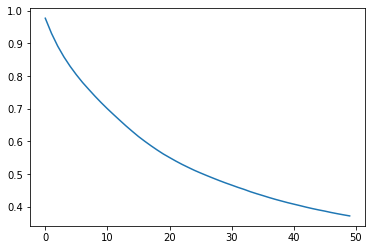

In [25]:
plt.plot(trained_model1.history["loss"])
plt.show()

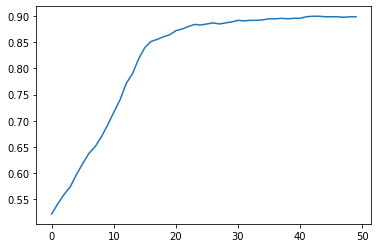

In [26]:
plt.plot(trained_model1.history["accuracy"])
plt.show()

In [27]:
#testing the model
Y_pred1 = model1.predict(X_test)
Y_pred1 = np.where(Y_pred1 >= 0.5,1,0)

In [28]:
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       221
           1       0.90      0.86      0.88       217

    accuracy                           0.88       438
   macro avg       0.88      0.88      0.88       438
weighted avg       0.88      0.88      0.88       438



In [29]:
#reduced overfit use regularisation score=0.91

In [30]:
#dropout in place of regularation in DL
#dropout
#create a neural network
model2 = tf.keras.models.Sequential([

    tf.keras.layers.Dense(5,input_shape=(X.shape[1],),activation="relu"), #hiddenlayer1
    
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1,activation="sigmoid"),


])

In [31]:
# Compile the model2
model2.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [32]:
trained_model2 = model2.fit(X_train,Y_train,batch_size=100,epochs=50)

Epoch 1/50
11/11 [==============================] - 0s 2ms/step - loss: 0.7397 - accuracy: 0.4064
Epoch 2/50
11/11 [==============================] - 0s 2ms/step - loss: 0.7132 - accuracy: 0.4802
Epoch 3/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5517
Epoch 4/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.5999
Epoch 5/50
11/11 [==============================] - 0s 1ms/step - loss: 0.6456 - accuracy: 0.6495
Epoch 6/50
11/11 [==============================] - 0s 1ms/step - loss: 0.6352 - accuracy: 0.6634
Epoch 7/50
11/11 [==============================] - 0s 1ms/step - loss: 0.6251 - accuracy: 0.6750
Epoch 8/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.6751
Epoch 9/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6121 - accuracy: 0.6835
Epoch 10/50
11/11 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.7365
Epoch 11/50
11/11 [

In [33]:
#testing the model
Y_pred2 = model2.predict(X_test)
Y_pred2 = np.where(Y_pred2 >= 0.5,1,0)

In [34]:
print(classification_report(Y_test,Y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       221
           1       0.89      0.88      0.89       217

    accuracy                           0.89       438
   macro avg       0.89      0.89      0.89       438
weighted avg       0.89      0.89      0.89       438

